In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


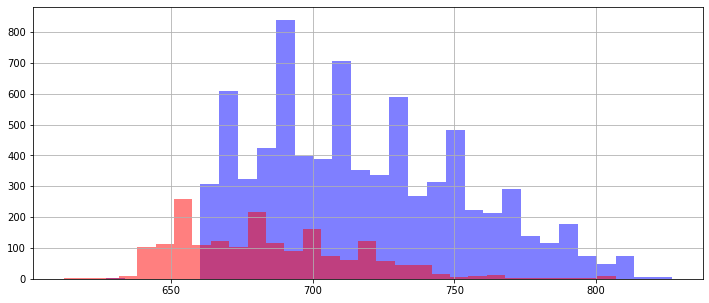

In [8]:
plt.figure(figsize=(12,5))
loans[loans['credit.policy'] == 1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30)
loans[loans['credit.policy'] == 0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,)


Text(0.5, 0, 'FICO')

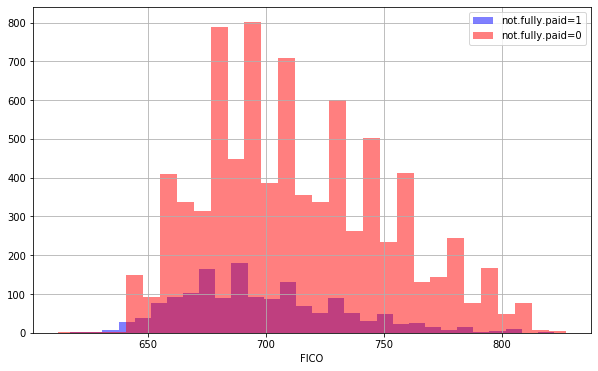

In [7]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

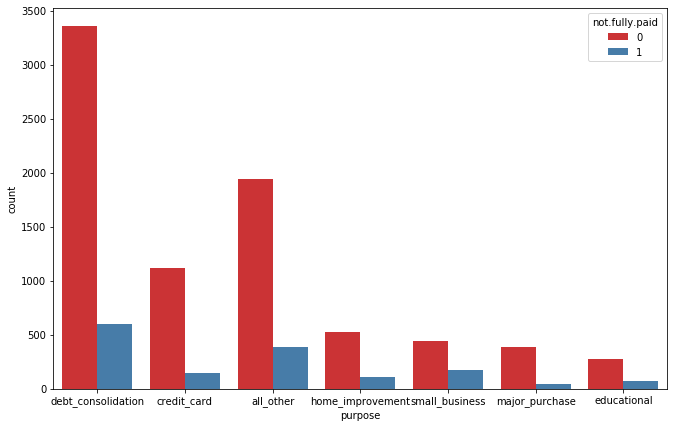

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

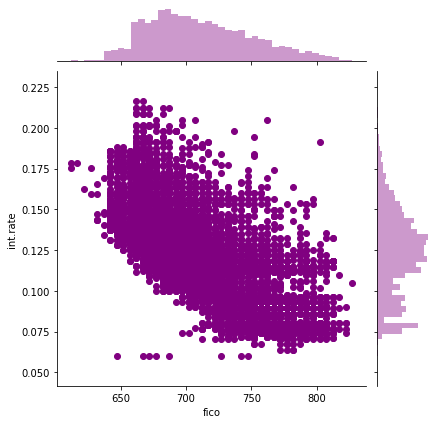

In [10]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 720x216 with 0 Axes>

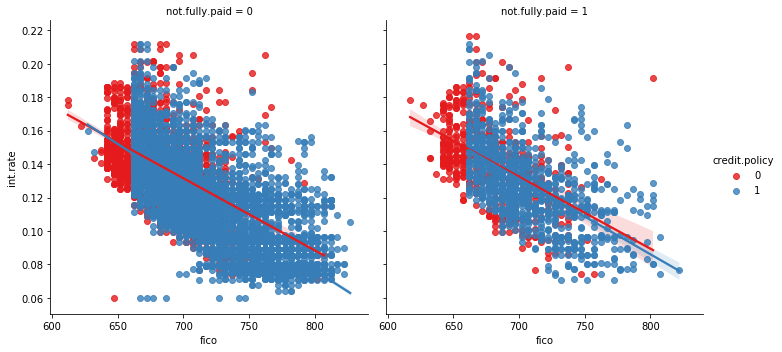

In [11]:
plt.figure(figsize=(10,3))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy', col='not.fully.paid',palette='Set1')

In [12]:
cat_feats = ['purpose']

In [13]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [14]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
predict = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=600)

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
predic =rfc.predict(X_test)

In [27]:
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874

